# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
# Setting citycount for city number to be displayed in for loop
citycount = 0

# Generating the variables needed for the dataframe columns as empty lists
found_cities, lat, lng, max_temp, humidity, cloudiness, wind_speed, country, date = [],[],[],[],[],[],[],[],[]

# Running for loop calling the API for each city's current weather data
for x in cities:
    citycount += 1
    print(f"Processing Record {citycount} of {len(cities)} | {x}")
    cityresp = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={x}&appid={weather_api_key}&units=imperial").json()
    
    time.sleep(1)
    
    try:
        lat.append(cityresp["coord"]["lat"])
        lng.append(cityresp["coord"]["lon"])
        max_temp.append(cityresp["main"]["temp_max"])
        humidity.append(cityresp["main"]["humidity"])
        cloudiness.append(cityresp["clouds"]["all"])
        wind_speed.append(cityresp["wind"]["speed"])
        country.append(cityresp["sys"]["country"])
        date.append(cityresp["dt"])
        found_cities.append(x)
        
    except:
        print(f"City of {x} not found. Skipping...")
        pass

Processing Record 1 of 594 | yulara
Processing Record 2 of 594 | katubao
Processing Record 3 of 594 | mana
Processing Record 4 of 594 | nantucket
Processing Record 5 of 594 | sitka
Processing Record 6 of 594 | illoqqortoormiut
City of illoqqortoormiut not found. Skipping...
Processing Record 7 of 594 | punta arenas
Processing Record 8 of 594 | pevek
Processing Record 9 of 594 | rikitea
Processing Record 10 of 594 | ilulissat
Processing Record 11 of 594 | filadelfia
Processing Record 12 of 594 | faya
Processing Record 13 of 594 | marystown
Processing Record 14 of 594 | kalabo
Processing Record 15 of 594 | butaritari
Processing Record 16 of 594 | fairbanks
Processing Record 17 of 594 | dikson
Processing Record 18 of 594 | puerto ayora
Processing Record 19 of 594 | bredasdorp
Processing Record 20 of 594 | thinadhoo
Processing Record 21 of 594 | biltine
Processing Record 22 of 594 | barrow
Processing Record 23 of 594 | lebu
Processing Record 24 of 594 | mwinilunga
Processing Record 25 of 5

Processing Record 197 of 594 | la ronge
Processing Record 198 of 594 | wamba
Processing Record 199 of 594 | cashel
Processing Record 200 of 594 | umzimvubu
City of umzimvubu not found. Skipping...
Processing Record 201 of 594 | teshie
Processing Record 202 of 594 | ukiah
Processing Record 203 of 594 | maniitsoq
Processing Record 204 of 594 | vaitupu
City of vaitupu not found. Skipping...
Processing Record 205 of 594 | baruun-urt
Processing Record 206 of 594 | tasiilaq
Processing Record 207 of 594 | grand river south east
City of grand river south east not found. Skipping...
Processing Record 208 of 594 | vardo
Processing Record 209 of 594 | ahipara
Processing Record 210 of 594 | ciampino
Processing Record 211 of 594 | pervomayskoye
Processing Record 212 of 594 | sao felix do xingu
Processing Record 213 of 594 | shitkino
Processing Record 214 of 594 | matara
Processing Record 215 of 594 | feodosiya
Processing Record 216 of 594 | eyrarbakki
Processing Record 217 of 594 | hami
Processing 

Processing Record 382 of 594 | lagoa
Processing Record 383 of 594 | abaza
Processing Record 384 of 594 | poya
Processing Record 385 of 594 | aripuana
Processing Record 386 of 594 | vrangel
Processing Record 387 of 594 | kokoda
Processing Record 388 of 594 | ejido
Processing Record 389 of 594 | nachingwea
Processing Record 390 of 594 | oak ridge
Processing Record 391 of 594 | xichang
Processing Record 392 of 594 | port hardy
Processing Record 393 of 594 | presidencia roque saenz pena
Processing Record 394 of 594 | bolama
Processing Record 395 of 594 | kokopo
Processing Record 396 of 594 | leon
Processing Record 397 of 594 | paradwip
City of paradwip not found. Skipping...
Processing Record 398 of 594 | araouane
Processing Record 399 of 594 | sheopur
Processing Record 400 of 594 | kralendijk
Processing Record 401 of 594 | pilar
Processing Record 402 of 594 | jishui
Processing Record 403 of 594 | mogok
Processing Record 404 of 594 | iskateley
Processing Record 405 of 594 | yakeshi
Process

Processing Record 568 of 594 | egvekinot
Processing Record 569 of 594 | goundam
Processing Record 570 of 594 | pasni
Processing Record 571 of 594 | tilichiki
Processing Record 572 of 594 | porto novo
Processing Record 573 of 594 | limin khersonisou
Processing Record 574 of 594 | balsas
Processing Record 575 of 594 | muli
Processing Record 576 of 594 | kawalu
Processing Record 577 of 594 | malwan
City of malwan not found. Skipping...
Processing Record 578 of 594 | musafirkhana
Processing Record 579 of 594 | terney
Processing Record 580 of 594 | lorengau
Processing Record 581 of 594 | andalan
Processing Record 582 of 594 | owando
Processing Record 583 of 594 | mandalgovi
Processing Record 584 of 594 | lima
Processing Record 585 of 594 | kabinda
Processing Record 586 of 594 | lolua
City of lolua not found. Skipping...
Processing Record 587 of 594 | temir
Processing Record 588 of 594 | qasigiannguit
Processing Record 589 of 594 | pitimbu
Processing Record 590 of 594 | barsovo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Turning all API calls into a dictionary and then into a dataframe
city_dict = {"City":found_cities,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date}
city_data = pd.DataFrame(city_dict)

# Exporting the data into a csv to save for future use

city_data.to_csv("CityWeather.csv", index=False)

In [38]:
# Reading CSV that just exported in order to skip running the first cells again when coming back to work on assignment
weather_data = pd.read_csv("CityWeather.csv")
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yulara,-25.2406,130.9889,68.00,20,20,17.27,AU,1611013223
1,katubao,5.8892,124.8294,78.13,71,99,2.17,PH,1611013224
2,mana,5.6592,-53.7767,78.01,83,100,12.46,GF,1611013225
3,nantucket,41.2835,-70.0995,42.80,75,1,14.97,US,1611013227
4,sitka,57.0531,-135.3300,44.60,81,90,23.02,US,1611013228
5,punta arenas,-53.1500,-70.9167,55.40,62,0,18.41,CL,1611013230
6,pevek,69.7008,170.3133,-29.07,86,93,6.82,RU,1611013231
7,rikitea,-23.1203,-134.9692,78.78,73,43,13.02,PF,1611013232
8,ilulissat,69.2167,-51.1000,12.20,61,97,3.44,GL,1611013233
9,filadelfia,39.9523,-75.1638,42.80,60,40,9.22,US,1611013205


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
weather_data.describe()
# There are no cities with humidity over 100

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,19.287353,19.513112,49.618516,73.342491,52.153846,8.124835,1.611014e+09
std,33.115526,91.277138,33.167448,19.233331,40.415118,6.022101,2.024329e+02
min,-54.800000,-179.166700,-55.910000,9.000000,0.000000,0.250000,1.611013e+09
25%,-8.724750,-58.611900,32.000000,64.000000,2.250000,3.600000,1.611013e+09
50%,22.184400,21.649100,61.340000,78.000000,60.500000,6.710000,1.611014e+09
75%,47.158275,102.101100,76.642500,86.000000,90.000000,11.500000,1.611014e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,33.150000,1.611014e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

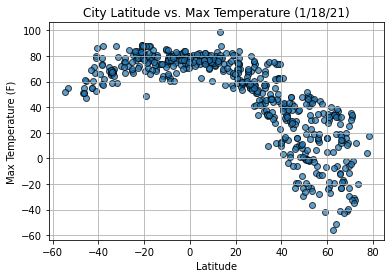

In [41]:
# Converting columns to lists for plotting datapoints
city_lat = weather_data["Lat"].to_list()
city_max_temp = weather_data["Max Temp"].to_list()

# Plotting
plt.scatter(city_lat,city_max_temp,facecolors="tab:blue",edgecolors="black",alpha=0.7)
plt.grid()
plt.title("City Latitude vs. Max Temperature (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Saving figure
plt.savefig("figures/latvstemp.png")

## Latitude vs. Humidity Plot

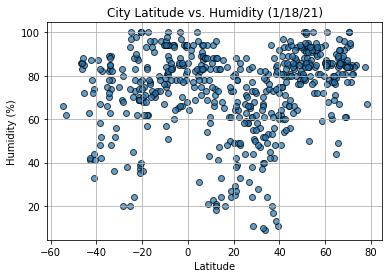

In [42]:
# Converting columns to lists for plotting datapoints (already have latitude)
city_humidity = weather_data["Humidity"].to_list()

# Plotting
plt.scatter(city_lat,city_humidity,facecolors="tab:blue",edgecolors="black",alpha=0.7)
plt.grid()
plt.title("City Latitude vs. Humidity (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Saving figure
plt.savefig("figures/latvshumid.png")

## Latitude vs. Cloudiness Plot

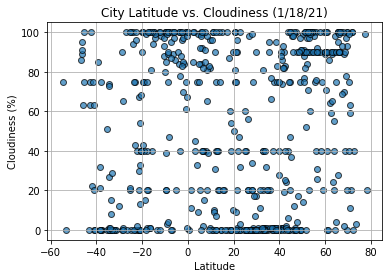

In [43]:
# Converting columns to lists for plotting datapoints (already have latitude)
city_cloudiness = weather_data["Cloudiness"].to_list()

# Plotting
plt.scatter(city_lat,city_cloudiness,facecolors="tab:blue",edgecolors="black",alpha=0.7)
plt.grid()
plt.title("City Latitude vs. Cloudiness (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Saving figure
plt.savefig("figures/latvscloud.png")

## Latitude vs. Wind Speed Plot

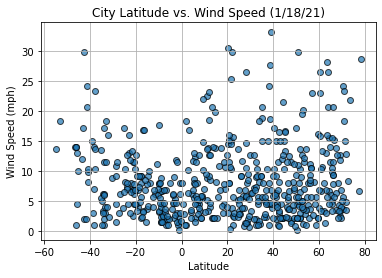

In [44]:
# Converting columns to lists for plotting datapoints (already have latitude)
city_wind_speed = weather_data["Wind Speed"].to_list()

# Plotting
plt.scatter(city_lat,city_wind_speed,facecolors="tab:blue",edgecolors="black",alpha=0.7)
plt.grid()
plt.title("City Latitude vs. Wind Speed (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Saving figure
plt.savefig("figures/latvswind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [104]:
# Creating individual dataframes for the cities located in each of the hemispheres
nhem_city = weather_data.loc[weather_data["Lat"] >= 0]
shem_city = weather_data.loc[weather_data["Lat"] < 0]

# Converting the latitudes to an array to use for the datapoints in each figure
nhem_lat = np.array(nhem_city["Lat"])
shem_lat = np.array(shem_city["Lat"])

# Double checking to make sure the minimum latitude isn't below zero
nhem_city.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,3.710000e+02
mean,38.187984,14.497173,38.180809,72.603774,51.075472,8.492156,1.611014e+09
std,20.331987,88.306548,34.234138,20.010859,40.336955,6.385765,2.012322e+02
min,0.133300,-179.166700,-55.910000,9.000000,0.000000,0.310000,1.611013e+09
25%,21.417650,-66.046950,14.000000,62.000000,2.000000,3.725000,1.611013e+09
50%,39.234200,21.548200,42.800000,79.000000,54.000000,6.760000,1.611014e+09
75%,54.060500,85.665100,69.755000,86.000000,90.000000,11.500000,1.611014e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,33.150000,1.611014e+09


In [105]:
# Double checking to make sure the maximum latitude isn't above zero
shem_city.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,-20.781984,30.146903,73.866457,74.908571,54.440000,7.346114,1.611014e+09
std,13.392445,96.676857,9.123692,17.422165,40.601166,5.097200,2.054595e+02
min,-54.800000,-175.200000,46.850000,20.000000,0.000000,0.250000,1.611013e+09
25%,-32.747100,-53.897450,68.045000,68.000000,3.500000,3.400000,1.611013e+09
50%,-20.016700,21.750000,76.730000,78.000000,68.000000,6.490000,1.611014e+09
75%,-9.121500,130.269450,80.225000,87.000000,96.000000,9.955000,1.611014e+09
max,-0.316700,176.350000,88.860000,100.000000,100.000000,29.840000,1.611014e+09


The r-value is: -0.8240715459186567


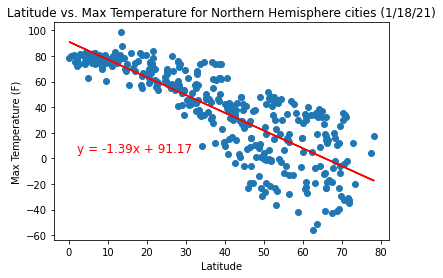

In [108]:
# Assigning Max Temp column to an array for datapoints
n_max_temp = np.array(nhem_city["Max Temp"])

# Calculating and printing correlation
correlation1 = st.pearsonr(nhem_lat,n_max_temp)
print(f"The r-value is: {correlation1[0]}")

# Generating and setting string for regression equation
(slope,intercept,rvalue,pvalue,stderr) = linregress(nhem_lat,n_max_temp)
regressvalues = nhem_lat*slope+intercept
lineequation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(nhem_lat,n_max_temp)
plt.plot(nhem_lat,regressvalues,"r-")
plt.annotate(lineequation,(2,5),fontsize=12,color="red")
plt.title("Latitude vs. Max Temperature for Northern Hemisphere cities (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Saving figure
plt.savefig("figures/nlatvsntemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.49209408944556454


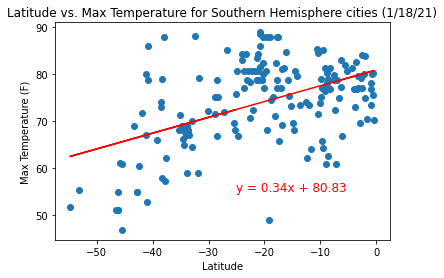

In [109]:
# Assigning Max Temp column to an array for datapoints
s_max_temp = np.array(shem_city["Max Temp"])

# Calculating and printing correlation
correlation2 = st.pearsonr(shem_lat,s_max_temp)
print(f"The r-value is: {correlation2[0]}")

# Generating and setting string for regression equation
(slope,intercept,rvalue,pvalue,stderr) = linregress(shem_lat,s_max_temp)
regressvalues = shem_lat*slope+intercept
lineequation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(shem_lat,s_max_temp)
plt.plot(shem_lat,regressvalues,"r-")
plt.annotate(lineequation,(-25,55),fontsize=12,color="red")
plt.title("Latitude vs. Max Temperature for Southern Hemisphere cities (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Saving figure
plt.savefig("figures/slatvsstemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3128639544580666


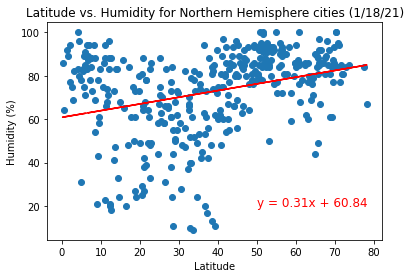

In [110]:
# Assigning Humidity column to an array for datapoints
n_humidity = np.array(nhem_city["Humidity"])

# Calculating and printing correlation
correlation3 = st.pearsonr(nhem_lat,n_humidity)
print(f"The r-value is: {correlation3[0]}")

# Generating and setting string for regression equation
(slope,intercept,rvalue,pvalue,stderr) = linregress(nhem_lat,n_humidity)
regressvalues = nhem_lat*slope+intercept
lineequation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(nhem_lat,n_humidity)
plt.plot(nhem_lat,regressvalues,"r-")
plt.annotate(lineequation,(50,20),fontsize=12,color="red")
plt.title("Latitude vs. Humidity for Northern Hemisphere cities (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Saving figure
plt.savefig("figures/nlatvsnhumid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3067166112809868


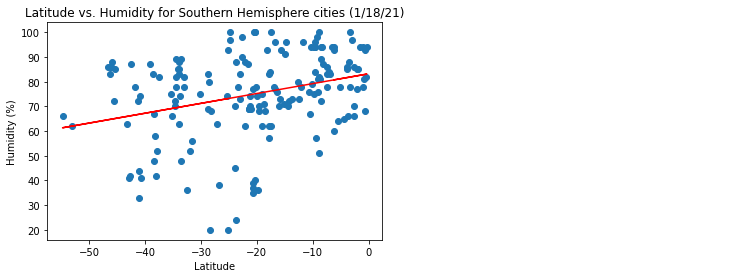

In [111]:
# Assigning Humidity column to an array for datapoints
s_humidity = np.array(shem_city["Humidity"])

# Calculating and printing correlation
correlation4 = st.pearsonr(shem_lat,s_humidity)
print(f"The r-value is: {correlation4[0]}")

# Generating and setting string for regression equation
(slope,intercept,rvalue,pvalue,stderr) = linregress(shem_lat,s_humidity)
regressvalues = shem_lat*slope+intercept
lineequation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(shem_lat,s_humidity)
plt.plot(shem_lat,regressvalues,"r-")
plt.annotate(lineequation,(50,20),fontsize=12,color="red")
plt.title("Latitude vs. Humidity for Southern Hemisphere cities (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Saving figure
plt.savefig("figures/slatvsshumid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22922703880203463


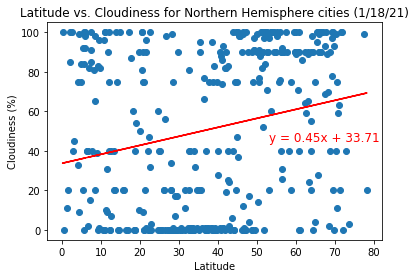

In [112]:
# Assigning Cloudiness column to an array for datapoints
n_cloudiness = np.array(nhem_city["Cloudiness"])

# Calculating and printing correlation
correlation5 = st.pearsonr(nhem_lat,n_cloudiness)
print(f"The r-value is: {correlation5[0]}")

# Generating and setting string for regression equation
(slope,intercept,rvalue,pvalue,stderr) = linregress(nhem_lat,n_cloudiness)
regressvalues = nhem_lat*slope+intercept
lineequation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(nhem_lat,n_cloudiness)
plt.plot(nhem_lat,regressvalues,"r-")
plt.annotate(lineequation,(53,45),fontsize=12,color="red")
plt.title("Latitude vs. Cloudiness for Northern Hemisphere cities (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Saving figure
plt.savefig("figures/nlatvsncloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.36256134146275565


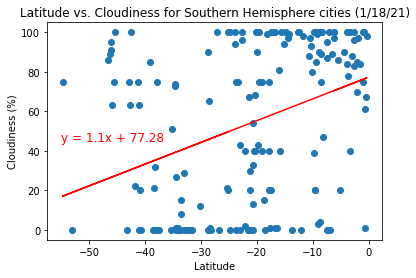

In [113]:
# Assigning Cloudiness column to an array for datapoints
s_cloudiness = np.array(shem_city["Cloudiness"])

# Calculating and printing correlation
correlation6 = st.pearsonr(shem_lat,s_cloudiness)
print(f"The r-value is: {correlation6[0]}")

# Generating and setting string for regression equation
(slope,intercept,rvalue,pvalue,stderr) = linregress(shem_lat,s_cloudiness)
regressvalues = shem_lat*slope+intercept
lineequation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(shem_lat,s_cloudiness)
plt.plot(shem_lat,regressvalues,"r-")
plt.annotate(lineequation,(-55,45),fontsize=12,color="red")
plt.title("Latitude vs. Cloudiness for Southern Hemisphere cities (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Saving figure
plt.savefig("figures/slatvsscloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07262955520657667


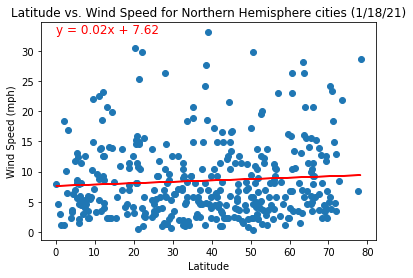

In [114]:
# Assigning Wind Speed column to an array for datapoints
n_wind_speed = np.array(nhem_city["Wind Speed"])

# Calculating and printing correlation
correlation7 = st.pearsonr(nhem_lat,n_wind_speed)
print(f"The r-value is: {correlation7[0]}")

# Generating and setting string for regression equation
(slope,intercept,rvalue,pvalue,stderr) = linregress(nhem_lat,n_wind_speed)
regressvalues = nhem_lat*slope+intercept
lineequation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(nhem_lat,n_wind_speed)
plt.plot(nhem_lat,regressvalues,"r-")
plt.annotate(lineequation,(0,33),fontsize=12,color="red")
plt.title("Latitude vs. Wind Speed for Northern Hemisphere cities (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Saving figure
plt.savefig("figures/nlatvsnwind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4303270202077052


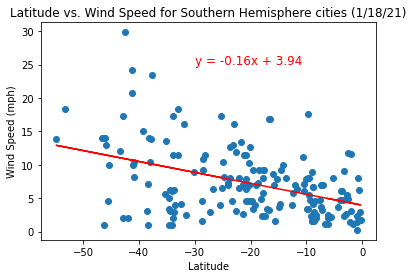

In [115]:
# Assigning Wind Speed column to an array for datapoints
s_wind_speed = np.array(shem_city["Wind Speed"])

# Calculating and printing correlation
correlation8 = st.pearsonr(shem_lat,s_wind_speed)
print(f"The r-value is: {correlation8[0]}")

# Generating and setting string for regression equation
(slope,intercept,rvalue,pvalue,stderr) = linregress(shem_lat,s_wind_speed)
regressvalues = shem_lat*slope+intercept
lineequation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(shem_lat,s_wind_speed)
plt.plot(shem_lat,regressvalues,"r-")
plt.annotate(lineequation,(-30,25),fontsize=12,color="red")
plt.title("Latitude vs. Wind Speed for Southern Hemisphere cities (1/18/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Saving figure
plt.savefig("figures/slatvsswind.png")